To get around Colab's Markdown display issues and potential issues with the `plotly` library, the questions in this problem set are rendered in code blocks. Simply re-run the associated code block to re-render the question, if needed.

As a benefit, the questions will come with occasional hints about your programming environment.

Make sure the file `PS7.py` is in the same directory as this notebook. This file contains the question definitions and helper functions for this dataset. Do not modify this file.

If you do use Google Colab, make the notebook editable for the TAs, and provide the share link to the notebook below. Please share the notebook you worked on, and not a copy of it.

**Make sure the 'notify' checkbox is <i>not</i> checked when sharing the notebook.**

--------


link to Colab: https://colab.research.google.com/drive/16mboz6MrtXZ7-IIMuchVLT7IYW70EEiW?authuser=1

(leave blank if not using Colab)

In [1]:
# download necessary packages
%pip install sentence-transformers plotly datasets transformers "transformers[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [2]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import seaborn as sns
sns.set_style()

import torch.nn as nn
import torch.nn.functional as F

import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import PS7

PS7 helper functions loaded [6a7fa96a6737421c2fed37cdfb4b7031]. Running in Colab: True
A GPU is available in this runtime. Make sure to use the GPU for deep-learning tasks.


<IPython.core.display.Javascript object>

In [3]:
PS7.intro()

<IPython.core.display.Javascript object>

In [4]:
PS7.q0()

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 0 - your answers here</b></span>

k-mean reference:

https://dataloop.ai/library/model/sentence-transformers_all-minilm-l6-v2/#:~:text=Being%20used%20for%20information%20retrieval,pieces%20(longer%20text%20is%20truncated)
https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670/
https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch


In [5]:
PS7.part1()

<IPython.core.display.Javascript object>

In [6]:
PS7.q1()

<IPython.core.display.Javascript object>

In [7]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes')
)

<IPython.core.display.Javascript object>

In [8]:
# your code here
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

<IPython.core.display.Javascript object>

In [9]:
print(newsgroups.target)
print(len(newsgroups.target_names))
print(newsgroups.target_names)

[10  3 17 ...  3  1  7]
20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 1 - your answers here</b></span>

a) The 20 newsgroups dataset comprises around 18,000 newsgroups posts on 20 topics. Each data point is a text post in one of 20 newsgroups.

b) The prediction target for each data point is an integer representing the newsgroup category, ranging from 0 to 19. There are 20 classes.

c) No, we cannot do so because LogisticRegression expects numerical input features but newsgroups["data"] contains raw text.

In [11]:
PS7.q2()

<IPython.core.display.Javascript object>

In [12]:
from sklearn.datasets import fetch_20newsgroups_vectorized

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

subset_size = 2000

# your code here
# load first 2000 data points
newsgroups_vectorized = fetch_20newsgroups_vectorized(subset='all')
X_tfidf_sparse = newsgroups_vectorized.data[:subset_size]
X_tfidf = X_tfidf_sparse.toarray()

print("TF-IDF shape:", X_tfidf.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

TF-IDF shape: (2000, 130107)


<IPython.core.display.Javascript object>

In [13]:
newsgroups_raw = newsgroups.data[:subset_size]
embeddings = []
# heuristic estimate for model's truncation limit
truncation_count = 0
truncation_limit_words = 256



for doc in newsgroups_raw:
  # split the text of each data point into sentences
  sentences = doc.split('.')

  # count words to estimate truncation
  if len(doc.split()) > truncation_limit_words:
      truncation_count += 1

  # encode each sentence and average
  sentence_embeddings = model.encode(sentences, batch_size=16, convert_to_numpy=True)
  doc_embedding = np.mean(sentence_embeddings, axis=0)
  embeddings.append(doc_embedding)

X_embed = np.vstack(embeddings)

print("Embedding shape:", X_embed.shape)
print("Estimated truncation count:", truncation_count)

Embedding shape: (2000, 384)
Estimated truncation count: 289


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 2 - your answers here</b></span>

a) Because the all-MiniLM-L6-v2 model has a maximum input size of 256 tokens, I used a simple heuristic by estimating token count through counting words.
Based on this, I estimated that 289 out of 2000 documents likely run into the model's truncation limit.

b) TF-IDF featurization shape: (2000, 130107); Transformer embedding shape: (2000, 384)

In [14]:
PS7.q3()

<IPython.core.display.Javascript object>

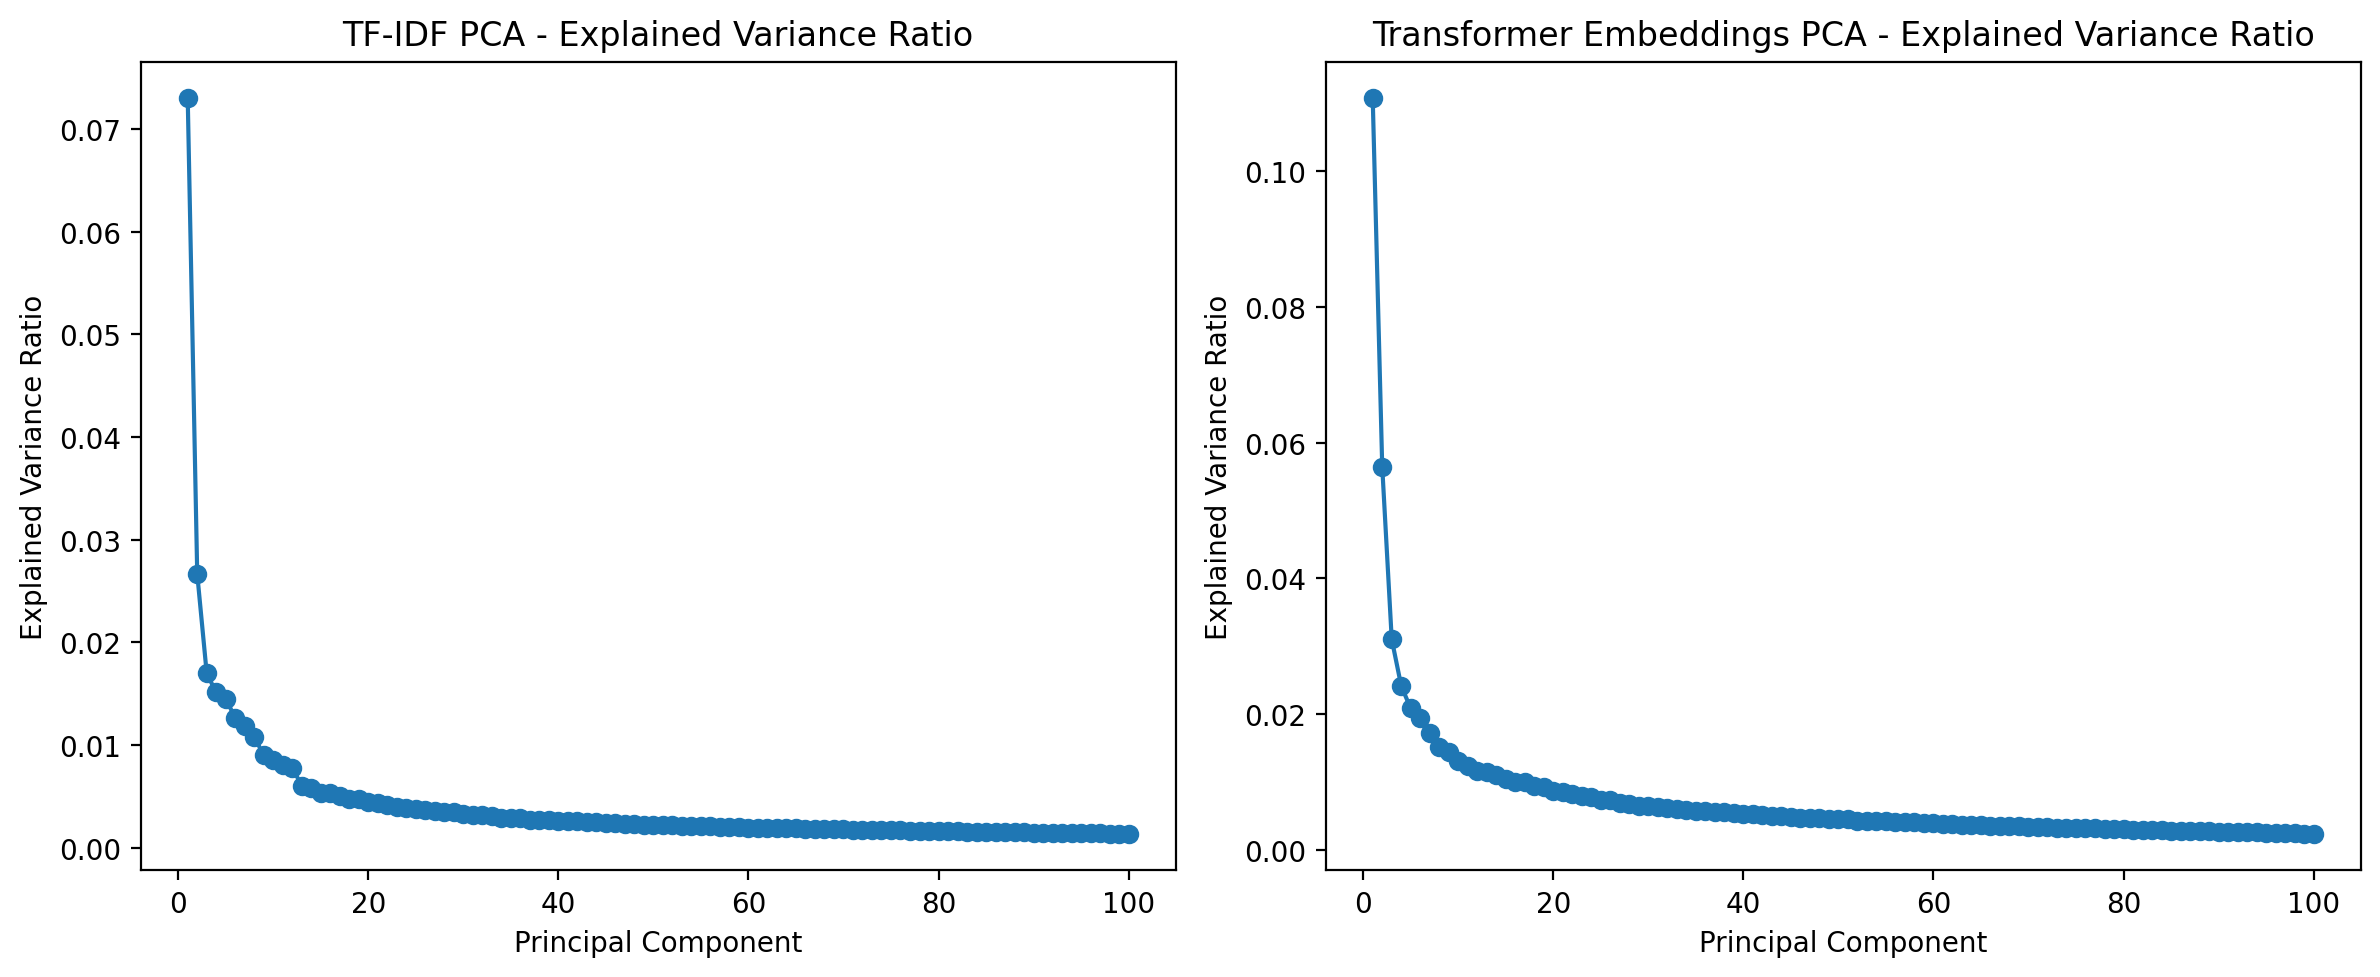

<IPython.core.display.Javascript object>

In [15]:
# your code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize transformer embeddings
scaler = StandardScaler()
X_embed_scaled = scaler.fit_transform(X_embed)


# TF-IDF PCA
pca_tfidf = PCA(n_components=100, random_state=55)
X_tfidf_pca = pca_tfidf.fit_transform(X_tfidf)
explained_tfidf = pca_tfidf.explained_variance_ratio_

# Embedding PCA
pca_embed = PCA(n_components=100, random_state=55)
X_embed_pca = pca_embed.fit_transform(X_embed_scaled)
explained_embed = pca_embed.explained_variance_ratio_


# plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 101), explained_tfidf, marker='o')
plt.title("TF-IDF PCA - Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 101), explained_embed, marker='o')
plt.title("Transformer Embeddings PCA - Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.tight_layout()
plt.show()

In [16]:
variance_tfidf_3 = explained_tfidf[:3].sum()
variance_embed_3 = explained_embed[:3].sum()


# variance lost
print(1 - variance_tfidf_3)
print(1 - variance_embed_3)

0.8833905086240025
0.80180115


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 3 - your answers here</b></span>

a) For the TF-IDF features, each individual component contributes relatively little variance. The information is spread across many dimensions. In contrast, the transformer embeddings have a more concentrated variance distribution, with the first component alone explaining over 11% of the total variance. Fewer components capture more of the meaningful structure in the data.


b) For the TF-IDF features, we lose approximately 88.3% of the variance. For the transformer embeddings, we lose approximately 80.2% of the variance.

In [17]:
PS7.q4()

<IPython.core.display.Javascript object>

In [18]:
import plotly.express as px

# your code here
pca_tfidf_3 = PCA(n_components=3, random_state=42)
X_tfidf_3d = pca_tfidf_3.fit_transform(X_tfidf)
explained_tfidf_3 = pca_tfidf_3.explained_variance_ratio_

pca_embed_3 = PCA(n_components=3, random_state=42)
X_embed_3d = pca_embed_3.fit_transform(X_embed_scaled)
explained_embed_3 = pca_embed_3.explained_variance_ratio_


# comparison var ratios
variance_tfidf_3_from_100 = explained_tfidf[:3].sum()
variance_tfidf_3_direct = explained_tfidf_3.sum()

variance_embed_3_from_100 = explained_embed[:3].sum()
variance_embed_3_direct = explained_embed_3.sum()

print("TF-IDF 3 from 100:", variance_tfidf_3_from_100)
print("TF-IDF 3 direct:", variance_tfidf_3_direct)

print("Embedding 3 from 100:", variance_embed_3_from_100)
print("Embedding 3 direct:", variance_embed_3_direct)


# compare components
components_100 = pca_tfidf.components_[:3]
components_3 = pca_tfidf_3.components_

print(components_100)
print(components_3)


TF-IDF 3 from 100: 0.11660949137599748
TF-IDF 3 direct: 0.1166094902376253
Embedding 3 from 100: 0.19819885
Embedding 3 direct: 0.19819883
[[-1.53759549e-02  9.73667697e-04  1.16030300e-05 ...  7.73576032e-06
  -0.00000000e+00 -0.00000000e+00]
 [-6.57332105e-03 -1.61270371e-03  5.41085087e-06 ... -2.75190932e-04
   0.00000000e+00  0.00000000e+00]
 [-3.59120635e-03  3.95696608e-03 -1.06669955e-05 ...  3.27256250e-04
   0.00000000e+00  0.00000000e+00]]
[[-1.53759551e-02  9.73667688e-04  1.16030300e-05 ...  7.73576109e-06
  -0.00000000e+00 -0.00000000e+00]
 [-6.57048215e-03 -1.61274030e-03  5.41328551e-06 ... -2.75152077e-04
  -0.00000000e+00 -0.00000000e+00]
 [-3.59057199e-03  3.95627574e-03 -1.06739546e-05 ...  3.27082786e-04
  -0.00000000e+00 -0.00000000e+00]]


<IPython.core.display.Javascript object>

In [19]:
labels = newsgroups.target[:subset_size]
target_names = newsgroups.target_names

# plot
fig_tfidf = px.scatter_3d(
    x=X_tfidf_3d[:, 0], y=X_tfidf_3d[:, 1], z=X_tfidf_3d[:, 2],
    color=[target_names[i] for i in labels],
    title="TF-IDF PCA"
)
fig_tfidf.update_traces(marker=dict(size=3))
fig_tfidf.show()


fig_embed = px.scatter_3d(
    x=X_embed_3d[:, 0], y=X_embed_3d[:, 1], z=X_embed_3d[:, 2],
    color=[target_names[i] for i in labels],
    title="Transformer Embeddings PCA"
)
fig_embed.update_traces(marker=dict(size=3))
fig_embed.show()


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 4 - your answers here</b></span>

a) They are nearly the same. For TF-IDF, the sum is approximately 0.1166, and for the transformer embeddings, it is about 0.1981. The tiny difference likely comes from numerical optimization.

b) The components are nearly the same, as shown above. The small differences are likely due to numerical optimization.

c) When mapped into a 3D space, the TF-IDF embeddings show a lot of mixing between newsgroups, with little to no visible separation between categories. In comparison, the transformer-based embeddings appear more organized in the 3D PCA space, with points of the same color tending to cluster more closely together. This suggests the transformer embeddings capture semantic meaning more effectively. However, the improvement is modest. While there are some loose groupings, some categories still overlap.

In [20]:
PS7.part2()

<IPython.core.display.Javascript object>

In [21]:
PS7.q5()

<IPython.core.display.Javascript object>

In [22]:
from sklearn.metrics import pairwise_distances_argmin


np.random.seed(42)


class KMeans:
    def __init__(self, n_clusters=20, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def initialize_centroids(self, X):
        indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[indices]

    def assign_points_centroids(self, X):
        return pairwise_distances_argmin(X, self.centroids)

    def compute_mean(self, X, assignments):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[assignments == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
        return new_centroids

    def fit(self, X):
        self.initialize_centroids(X)
        for i in range(self.max_iter):
            assignments = self.assign_points_centroids(X)
            new_centroids = self.compute_mean(X, assignments)

            # check convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break

            self.centroids = new_centroids

        return self.centroids, assignments, i + 1



<IPython.core.display.Javascript object>

In [23]:
# TF-IDF
kmeans_tfidf = KMeans()
centroids_tfidf, points_tfidf, num_iter_tfidf = kmeans_tfidf.fit(X_tfidf_3d)
print("TF-IDF k-means")
print(centroids_tfidf[:2])
print(points_tfidf[:10])
print(num_iter_tfidf)



# Embeddings
kmeans_embed = KMeans()
centroids_embed, points_embed, num_iter_embed = kmeans_embed.fit(X_embed_3d)


print("Embeddings k-means")
print(centroids_embed[:2])
print(points_embed[:10])
print(num_iter_embed)

TF-IDF k-means
[[-0.03908998 -0.20644329 -0.14917394]
 [-0.06762851  0.23601628 -0.04202893]]
[14  3  3  7 12 16  9 11  7 10]
50
Embeddings k-means
[[-5.1920805  -9.28658581  4.20908833]
 [23.30597305  1.58948922  1.50460315]]
[11  5  6 10 15 13 18 16  2  6]
32


<IPython.core.display.Javascript object>

In [24]:
PS7.q6()

<IPython.core.display.Javascript object>

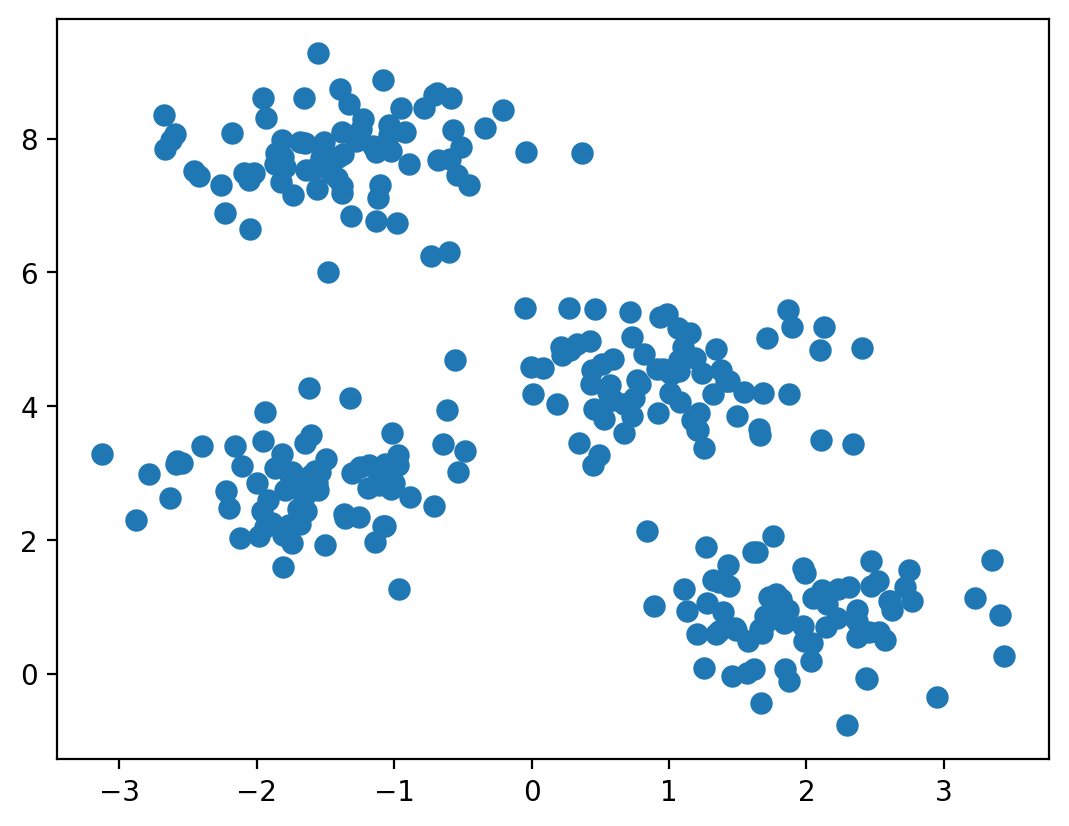

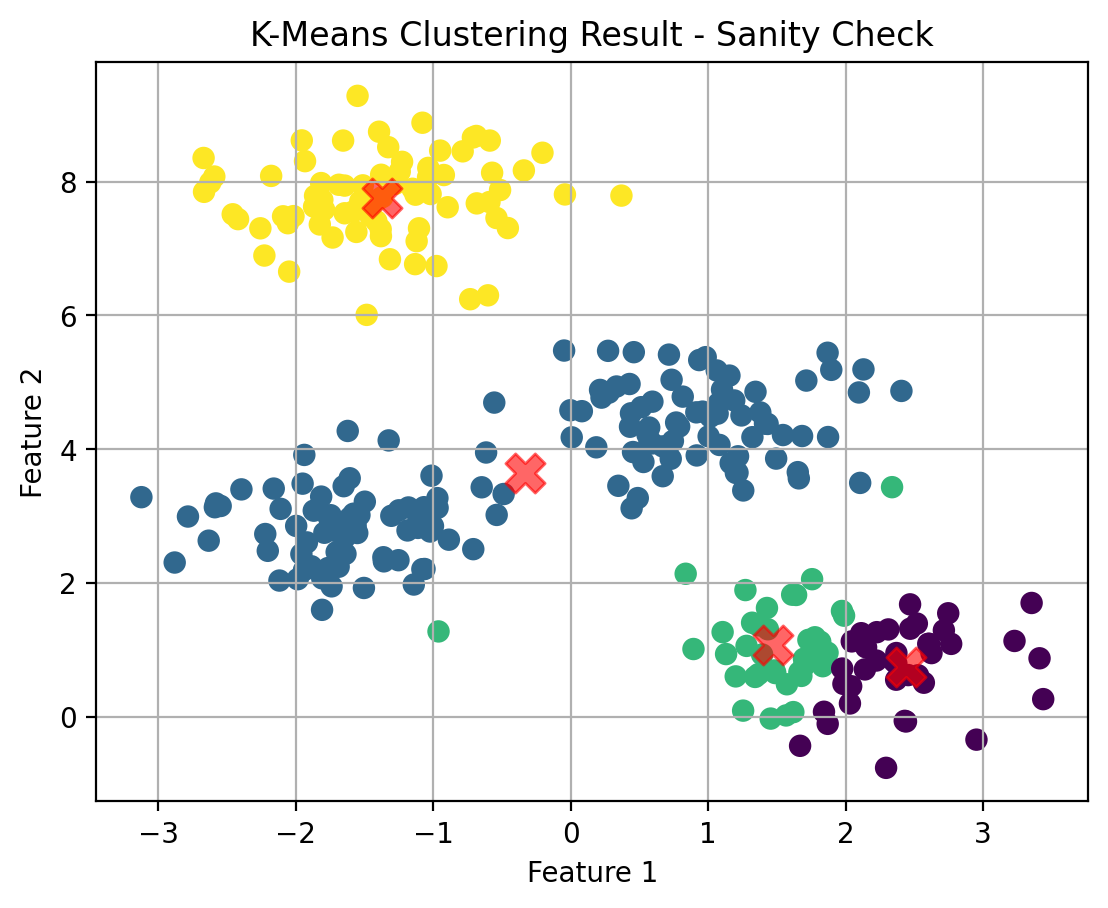

<IPython.core.display.Javascript object>

In [25]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# visualize the synthetic dataset to choose the number of clusters
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


# your code here
kmeans_syn = KMeans(n_clusters=4)
centroids_syn, points_syn, num_iter_syn = kmeans_syn.fit(X)

# plot
plt.scatter(X[:, 0], X[:, 1], c=points_syn, s=50, cmap='viridis')
plt.scatter(centroids_syn[:, 0], centroids_syn[:, 1], c='red', s=200, alpha=0.6, marker='X')
plt.title(f"K-Means Clustering Result - Sanity Check")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [26]:
PS7.q7()

<IPython.core.display.Javascript object>

In [27]:
# your code here

def DB_index(centroids, points, X):
    n_clusters = len(centroids)
    sigmas = np.zeros(n_clusters)

    # compute average intra-cluster distance
    for i in range(n_clusters):
        cluster_points = X[points == i]
        if len(cluster_points) > 0:
            dists = np.linalg.norm(cluster_points - centroids[i], axis=-1)
            sigmas[i] = np.mean(dists)

    # compute DB index
    db_values = []
    for i in range(n_clusters):
        max_ratio = -np.inf
        for j in range(n_clusters):
            if i == j:
                continue
            dist_centroids = np.linalg.norm(centroids[i] - centroids[j])
            if dist_centroids == 0:
                continue
            ratio = (sigmas[i] + sigmas[j]) / dist_centroids
            max_ratio = max(max_ratio, ratio)
        db_values.append(max_ratio)

    return np.mean(db_values)


<IPython.core.display.Javascript object>

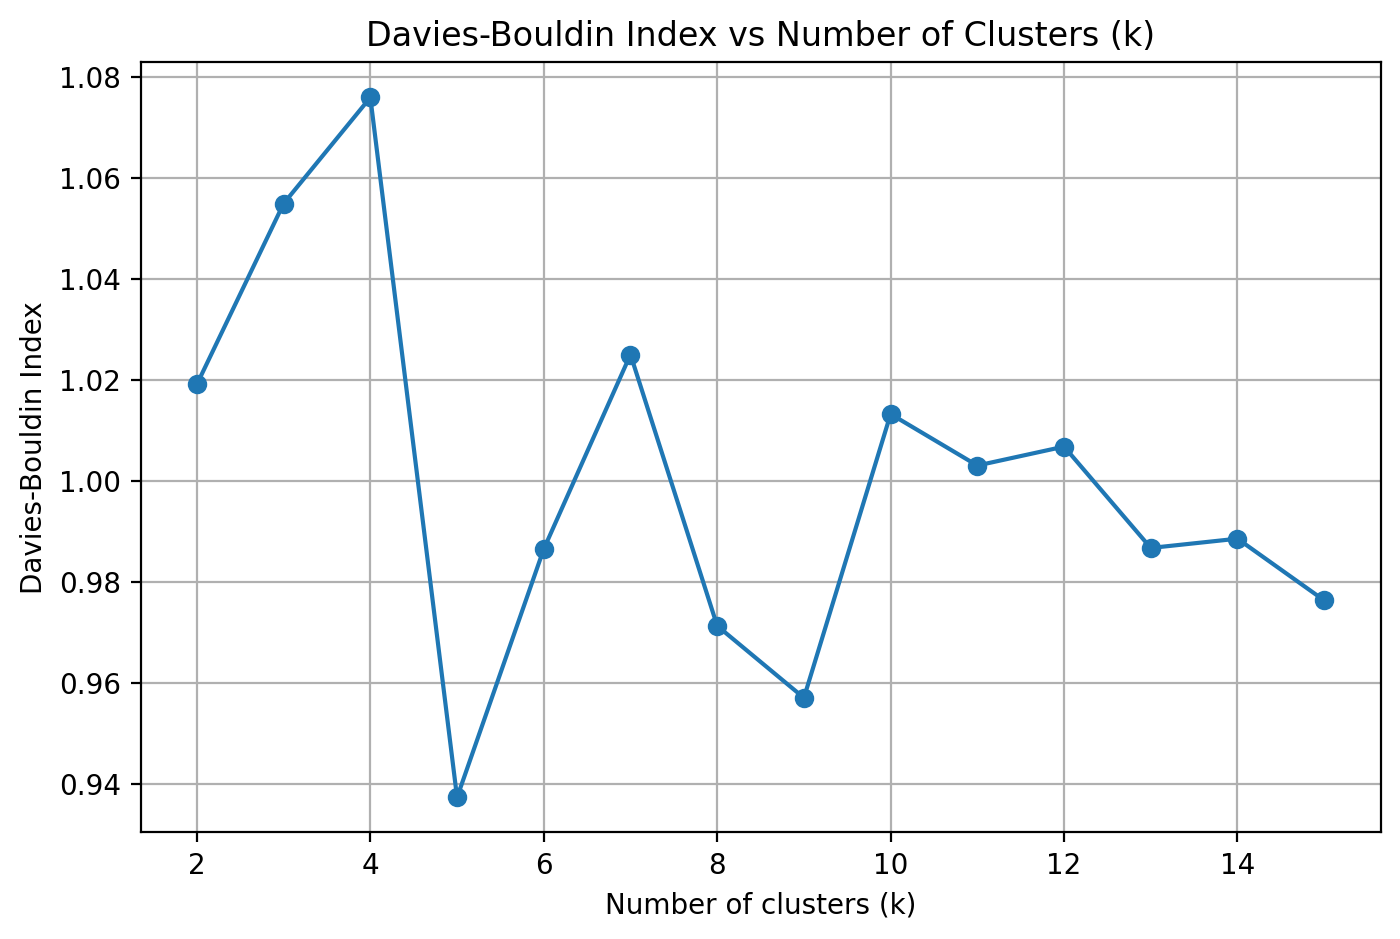

<IPython.core.display.Javascript object>

In [28]:
db_scores = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    centroids, assignments, _ = kmeans.fit(X_embed_3d)
    db = DB_index(centroids, assignments, X_embed_3d)
    db_scores.append(db)


# plot DB index vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.show()


In [29]:
optimal_k = k_values[np.argmin(db_scores)]
print("Optimal k:", optimal_k)

Optimal k: 5


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 7 - your answers here</b></span>

c) The Davies-Bouldin index suggests that the optimal number of clusters is 5, which is much lower than the actual 20 newsgroups. This implies that several newsgroups share similar semantic content and tend to merge in the embedding space. Here, the interpretation matches the 3D PCA visualization from Question 4c, where there appears to be partial grouping.

In [30]:
PS7.part3()

<IPython.core.display.Javascript object>

In [31]:
PS7.q8()

<IPython.core.display.Javascript object>

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from PS7 import newsgroups_tokenized_datasets

# tokenize the training and validation datasets and handle padding tokens (done for you)
base_model = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(base_model)
trn_dataset, val_dataset = newsgroups_tokenized_datasets(tokenizer)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map (num_proc=4):   0%|          | 0/11314 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/7532 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

In [33]:
# instantiate the model

# hint: pass in pad_token_id=tokenizer.pad_token_id
model = AutoModelForSequenceClassification.from_pretrained(
    base_model,
    num_labels=20,
    pad_token_id=tokenizer.pad_token_id
)


# define the evaluation metrics
import evaluate
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# hyperparameters
args = TrainingArguments(
    report_to="none", # keep this to disable external logging
    # your code here
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir="./logs"
)

trainer = Trainer(
    # your code here
    model=model,
    args=args,
    train_dataset=trn_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
trainer.train()

# evaluation code here
val_results = trainer.evaluate()
print("Validation Accuracy:", val_results["eval_accuracy"])


train_results = trainer.evaluate(eval_dataset=trn_dataset)
print("Training Accuracy:", train_results["eval_accuracy"])


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<ipython-input-33-6a9d25c359e3>:36: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.305488,0.594796
2,1.756900,1.195996,0.630112
3,1.046000,1.169287,0.646973


Validation Accuracy: 0.6469729155602761


Training Accuracy: 0.7226445112250309


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 8 - your answers here</b></span>

hyperparameters:
*   learning_rate = 2e-5  
*   weight_decay = 0.01
*   batch_size = 32 (for both training and evaluation)  
*   num_train_epochs = 3  
*   load_best_model_at_end = True  
*   evaluation_strategy = "epoch"  
*   save_strategy = "epoch"

train accuracy: 0.7226

test accuracy: 0.6469

In [34]:
PS7.q9()

<IPython.core.display.Javascript object>

In [35]:
# your code here


# TF-IDF
train_vect = fetch_20newsgroups_vectorized(subset="train")
test_vect = fetch_20newsgroups_vectorized(subset="test")
X_train_tfidf = train_vect.data
X_test_tfidf = test_vect.data
y_train = train_vect.target
y_test = test_vect.target

# MiniLM
train_raw = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))
test_raw = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'))
y_train_embed = train_raw.target
y_test_embed = test_raw.target

model = SentenceTransformer('all-MiniLM-L6-v2')

def embed_documents(docs):
    embeddings = []
    for doc in docs:
        sentences = doc.split('.')
        sentence_embeddings = model.encode(sentences, batch_size=16, convert_to_numpy=True)
        doc_embedding = np.mean(sentence_embeddings, axis=0)
        embeddings.append(doc_embedding)
    return np.vstack(embeddings)

X_train_embed = embed_documents(train_raw.data)
X_test_embed = embed_documents(test_raw.data)




<IPython.core.display.Javascript object>

In [36]:
from sklearn.linear_model import LogisticRegressionCV
scaler = StandardScaler()
X_train_embed_scaled = scaler.fit_transform(X_train_embed)
X_test_embed_scaled = scaler.transform(X_test_embed)


# TF-IDF classifier
clf_tfidf = LogisticRegressionCV(cv=5, max_iter=2000, random_state=42).fit(X_train_tfidf, y_train)
acc_train_tfidf = clf_tfidf.score(X_train_tfidf, y_train)
acc_test_tfidf = clf_tfidf.score(X_test_tfidf, y_test)

# MiniLM classifier
clf_embed = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 13),
    cv=5,
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=5000,
    n_jobs=-1,
    random_state=42,
).fit(X_train_embed_scaled, y_train_embed)
acc_train_embed = clf_embed.score(X_train_embed_scaled, y_train_embed)
acc_test_embed = clf_embed.score(X_test_embed_scaled, y_test_embed)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



<IPython.core.display.Javascript object>

In [37]:
print(clf_tfidf.C_[0])
print(acc_train_tfidf)
print(acc_test_tfidf)

print(clf_embed.C_[0])
print(acc_train_embed)
print(acc_test_embed)

1291.5496650148827
0.9995580696482235
0.7992565055762082
0.01
0.7856637793883684
0.6541423260754116


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 9 - your answers here</b></span>

tf-idf hyperparameters:
*  Solver: 'lbfgs'
*  multi_class='ovr'
*  Regularization strength: C = 1291.55
*  Max iterations: 2000


tf-idf train accuracy: 0.9995

tf-idf test accuracy: 0.7992

miniLM hyperparameters:
*  Solver: 'lbfgs'
*  multi_class='multinomial'
*  Regularization strength: C = 0.01
*  Max iterations: 5000



miniLM train accuracy: 0.7856

miniLM test accuracy: 0.6541

discussion:


Logistic regression worked really well with the TF-IDF features, reaching around 80% accuracy on the test set. It did slightly overfit the training data, but that’s not too surprising given how high-dimensional and sparse TF-IDF representations can be. Still, the model took advantage of the strong word-topic patterns in the 20 Newsgroups dataset.

The MiniLM logistic regression setup also did a great job, with about 65.4% test accuracy. It didn’t perform quite as well as TF-IDF, likely because the embeddings are more general and compact. They help with generalization, but don't capture specific topic details as clearly.

When compared to a fine-tuned DistilGPT2 model (which achieved around 66% on the validation set), both logistic regression models were faster, easier to interpret, and less computationally expensive. The TF-IDF approach not only trained faster but also outperformed DistilGPT2 in accuracy, while the MiniLM setup also performed slightly better.

In [38]:
PS7.ec1()

<IPython.core.display.Javascript object>

In [39]:
# your code here
from sklearn.manifold import TSNE

tsne_tfidf_3 = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
tsne_X_tfidf_3d = tsne_tfidf_3.fit_transform(X_tfidf)


tsne_embed_3 = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
tsne_X_embed_3d = tsne_embed_3.fit_transform(X_embed_scaled)



labels = newsgroups.target[:subset_size]
target_names = newsgroups.target_names

# plot
fig_tfidf = px.scatter_3d(
    x=tsne_X_tfidf_3d[:, 0], y=tsne_X_tfidf_3d[:, 1], z=tsne_X_tfidf_3d[:, 2],
    color=[target_names[i] for i in labels],
    title="TF-IDF TSNE"
)
fig_tfidf.update_traces(marker=dict(size=3))
fig_tfidf.show()


fig_embed = px.scatter_3d(
    x=tsne_X_embed_3d[:, 0], y=tsne_X_embed_3d[:, 1], z=tsne_X_embed_3d[:, 2],
    color=[target_names[i] for i in labels],
    title="Transformer Embeddings TSNE"
)
fig_embed.update_traces(marker=dict(size=3))
fig_embed.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Extra credit 1 - your answers here</b></span>

a) According to the documentation, t-SNE and PCA differ in both method and focus. t-SNE is a non-linear technique that emphasizes preserving local relationships between data points, and it is well-suited for visualizing clusters in high-dimensional data. t-SNE does this by converting pairwise similarities into probabilities and minimizing the difference between high- and low-dimensional distributions. PCA, on the other hand, is a linear method that projects data onto directions of maximum variance to preserve the global structure.

b) I noticed that the clusters in the t-SNE plot are tighter compared to those from PCA, especially when using TF-IDF features. t-SNE produces more visually meaningful groupings, making it easier to distinguish between different topics or categories in the data.


In [40]:
PS7.ec2()

<IPython.core.display.Javascript object>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F



class SelfAttention(nn.Module):
    def __init__(self, d_embedding):
        """
        d_embedding: int, the dimension of the input embedding
        """
        super().__init__()
        # your code here
        self.query = nn.Linear(d_embedding, d_embedding)
        self.key   = nn.Linear(d_embedding, d_embedding)
        self.value = nn.Linear(d_embedding, d_embedding)


    def forward(self, x):
        # your code here
        # project Q, K, V
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        # compute attention score
        scores = torch.bmm(Q, K.transpose(1, 2)) / (Q.size(-1) ** 0.5)

        # get attention weight
        attn_weights = F.softmax(scores, dim=-1)

        # compute attention output
        attn_output = torch.bmm(attn_weights, V)

        return attn_output, attn_weights

def attention_classifier(num_classes):
    # create an embedding layer and freeze it so that it won't be updated
    embed = nn.Embedding.from_pretrained(..., freeze=True)
    d_embedding = embed.embedding_dim

    # your implemented attention layer
    attn = SelfAttention(d_embedding=d_embedding)

    # classifier head
    return nn.Sequential(
        embed,                      # tokens -> word vectors
        attn,                       # self‑attention
        nn.AdaptiveAvgPool1d(1),    # mean-pool over the sequence of words
        nn.Flatten(),
        nn.Linear(d_embedding, num_classes)  # classifier
    )


<IPython.core.display.Javascript object>

In [42]:
PS7.ec3()

<IPython.core.display.Javascript object>

In [47]:
# your code here
# redo Q8
train_texts=train_raw.data
val_texts=test_raw.data
all_texts = train_texts + val_texts
X_embed_all = embed_documents(all_texts)
scaler = StandardScaler()
X_embed_all_scaled = scaler.fit_transform(X_embed_all)


# create new labels from kmean
kmeans = KMeans(n_clusters=optimal_k)
_, cluster_labels, _ = kmeans.fit(X_embed_all_scaled)


<IPython.core.display.Javascript object>

In [76]:
def cluster_labeled_tokenized_datasets(tokenizer, train_texts, val_texts, cluster_labels, batch_size=32, num_workers=4):
    train_size = len(train_texts)
    val_size = len(val_texts)

    train_labels = cluster_labels[:train_size]
    val_labels = cluster_labels[train_size:train_size + val_size]


    trn_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
    val_dataset = Dataset.from_dict({"text": val_texts, "label": val_labels})

    # handle tokenization padding
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.pad_token_id = tokenizer.eos_token_id


    tokenize = lambda batch: tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

    trn_dataset = trn_dataset.map(tokenize, batched=True, batch_size=batch_size, num_proc=num_workers)
    val_dataset = val_dataset.map(tokenize, batched=True, batch_size=batch_size, num_proc=num_workers)

    return trn_dataset, val_dataset





<IPython.core.display.Javascript object>

In [77]:
from datasets import Dataset

trn_dataset_km, val_dataset_km = cluster_labeled_tokenized_datasets(
    tokenizer=tokenizer,
    train_texts=train_raw.data,
    val_texts=test_raw.data,
    cluster_labels=cluster_labels
)

Map (num_proc=4):   0%|          | 0/11314 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/7532 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

In [81]:
model_km = AutoModelForSequenceClassification.from_pretrained(
    base_model,
    num_labels=optimal_k,
    pad_token_id=tokenizer.pad_token_id
)


trainer_km = Trainer(
    model=model_km,
    args=args,
    train_dataset=trn_dataset_km,
    eval_dataset=val_dataset_km,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer_km.train()



val_results_km = trainer_km.evaluate()
print("Validation Accuracy:", val_results_km["eval_accuracy"])

train_results_km = trainer_km.evaluate(eval_dataset=trn_dataset_km)
print("Training Accuracy:", train_results_km["eval_accuracy"])


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-81-a86ee1102d77>:8: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.555665,0.792353
2,0.770300,0.463392,0.819304
3,0.430900,0.447087,0.828465


Validation Accuracy: 0.8284652150823154
Training Accuracy: 0.861764185964292


<IPython.core.display.Javascript object>

In [85]:
# redo Q9
# your code here

# change labels
train_size = len(train_texts)
val_size = len(val_texts)

y_train_km = cluster_labels[:train_size]
y_test_km = cluster_labels[train_size:]

<IPython.core.display.Javascript object>

In [91]:
X_all_tfidf = np.vstack([X_train_tfidf.toarray(), X_test_tfidf.toarray()])

kmeans_tfidf = KMeans(n_clusters=optimal_k)
_, cluster_labels_all, _ = kmeans_tfidf.fit(X_all_tfidf)

y_train_km_tfidf = cluster_labels_all[:len(X_train_tfidf.toarray())]
y_test_km_tfidf = cluster_labels_all[len(X_train_tfidf.toarray()):]

<IPython.core.display.Javascript object>

In [92]:
# TF-IDF classifier
clf_tfidf_km = LogisticRegressionCV(cv=5, max_iter=2000, random_state=42).fit(X_train_tfidf, y_train_km_tfidf)
acc_train_tfidf_km = clf_tfidf_km.score(X_train_tfidf, y_train_km_tfidf)
acc_test_tfidf_km = clf_tfidf_km.score(X_test_tfidf, y_test_km_tfidf)


# MiniLM classifier
clf_embed_km = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 13),
    cv=5,
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=5000,
    n_jobs=-1,
    random_state=42,
).fit(X_train_embed_scaled, y_train_km)
acc_train_embed_km = clf_embed_km.score(X_train_embed_scaled, y_train_km)
acc_test_embed_km = clf_embed_km.score(X_test_embed_scaled, y_test_km)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



<IPython.core.display.Javascript object>

In [93]:
print(clf_tfidf_km.C_[0])
print(acc_train_tfidf_km)
print(acc_test_tfidf_km)

print(clf_embed_km.C_[0])
print(acc_train_embed_km)
print(acc_test_embed_km)

2.782559402207126
0.9986742089446703
0.9654806160382369
0.03162277660168379
0.9982322785928938
0.9780934678704195


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Extra credit 3 - your answers here</b></span>

Using cluster IDs from KMeans as labels, the fine-tuned transformer’s performance improved to 82.8% accuracy, which was higher than it achieved with the original labels. Logistic regression also saw a significant boost when trained to predict the cluster IDs instead of the original topics, reaching 96.5% test accuracy with TF-IDF features and 97.8% with MiniLM embeddings. These results are much stronger than those from the original setup in Question 9. This improvement makes sense because both clustering and classification were done in the same feature space, making the decision boundaries more aligned with the new labels. In contrast, the original topic labels likely did not match well with the structure of the data in either embedding space.

